In [51]:
import numpy as np
%store -r pred_test_d
%store -r pred_test_a
%store -r pred_test_dna
%store -r y_test
from etape2_Q3 import *

In [23]:
fpr_d, tpr_d, roc_auc_d = get_roc_data(y_test, pred_test_d[:,1])
fpr_a, tpr_a, roc_auc_a = get_roc_data(y_test, pred_test_a[:,1])
fpr_dna, tpr_dna, roc_auc_dna = get_roc_data(y_test, pred_test_dna[:,1])
perc_d, perc_values_d, num_goals_d = get_percentile_goal_chance(pred_test_d[:,1], y_test)
perc_a, perc_values_a, num_goals_a = get_percentile_goal_chance(pred_test_a[:,1], y_test)
perc_dna, perc_values_dna, num_goals_dna = get_percentile_goal_chance(pred_test_dna[:,1], y_test)

In [24]:
sum_goal_shot = len(y_test)/100
goal_rate_d = [i/sum_goal_shot for i in num_goals_d]
goal_rate_a = [i/sum_goal_shot for i in num_goals_a]
goal_rate_dna = [i/sum_goal_shot for i in num_goals_dna]
goal_rate_d = [i*100 for i in perc_values_d]
goal_rate_a = [i*100 for i in perc_values_a]
goal_rate_dna = [i*100 for i in perc_values_dna]

In [25]:
cum_values_d = np.cumsum(num_goals_d)
cum_values_a = np.cumsum(num_goals_a)
cum_values_dna = np.cumsum(num_goals_dna)
sum = np.sum(num_goals_d)/100
cum_values_d = [i/sum for i in cum_values_d]
cum_values_a = [i/sum for i in cum_values_a]
cum_values_dna = [i/sum for i in cum_values_dna]

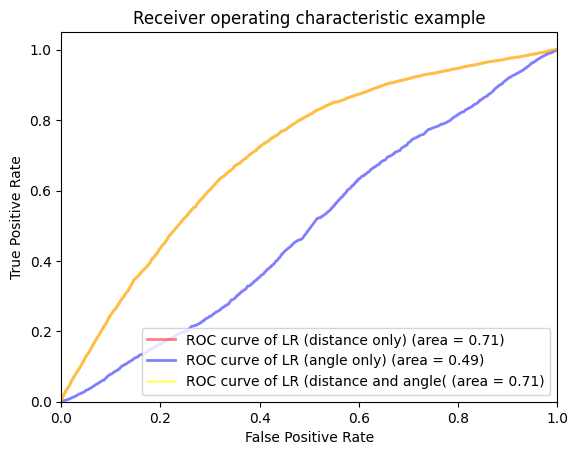

In [31]:
plt.figure()
lw = 2
plt.plot(fpr_d,tpr_d,color="red",lw=lw,alpha=0.5,label="ROC curve of LR (distance only) (area = %0.2f)" % roc_auc_d)
plt.plot(fpr_a,tpr_a,color="blue",lw=lw,alpha=0.5,label="ROC curve of LR (angle only) (area = %0.2f)" % roc_auc_a)
plt.plot(fpr_dna,tpr_dna,color="yellow",lw=lw,alpha=0.5,label="ROC curve of LR (distance and angle( (area = %0.2f)" % roc_auc_dna)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

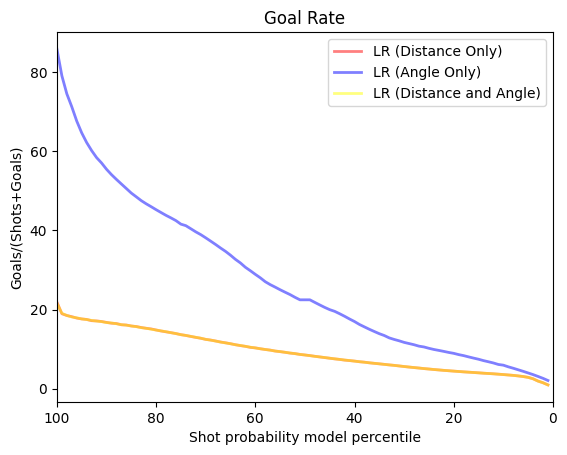

In [32]:
plt.figure()
lw = 2
plt.plot(perc_d,goal_rate_d,color="red",alpha=0.5,lw=lw,label="LR (Distance Only)")
plt.plot(perc_a,goal_rate_a,color="blue",alpha=0.5,lw=lw,label="LR (Angle Only)")
plt.plot(perc_dna,goal_rate_dna,color="yellow",alpha=0.5,lw=lw,label="LR (Distance and Angle)")


plt.xlim([100, 0])
#plt.ylim([0, 100])
plt.xlabel("Shot probability model percentile")
plt.ylabel("Goals/(Shots+Goals)")
plt.title("Goal Rate")
plt.legend(loc="upper right")
plt.show()

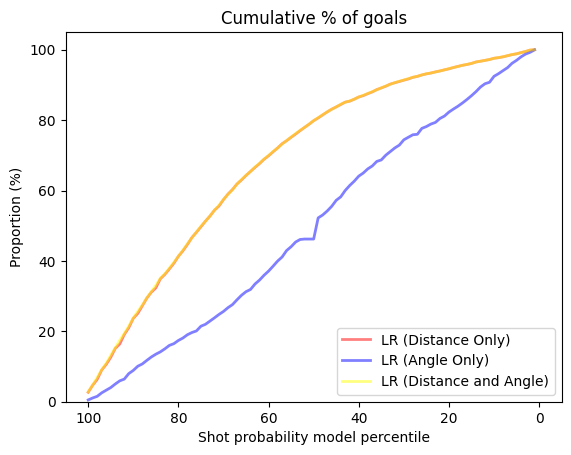

In [33]:
plt.figure()
lw = 2
plt.plot(perc_d,cum_values_d,color="red",alpha=0.5,lw=lw,label="LR (Distance Only)")
plt.plot(perc_a,cum_values_a,color="blue",alpha=0.5,lw=lw,label="LR (Angle Only)")
plt.plot(perc_dna,cum_values_dna,color="yellow",alpha=0.5,lw=lw,label="LR (Distance and Angle)")


plt.xlim([105, -5])
plt.ylim([0, 105])
plt.xlabel("Shot probability model percentile")
plt.ylabel("Proportion (%)")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.show()

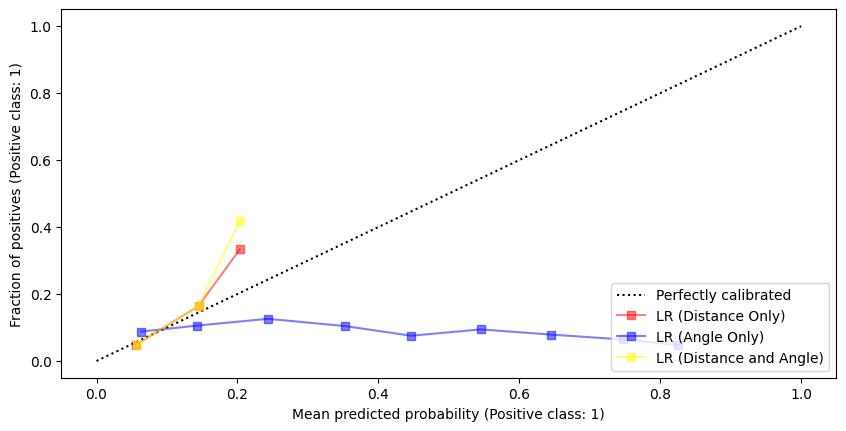

In [52]:
from sklearn.calibration import CalibrationDisplay
from matplotlib.gridspec import GridSpec
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
pred_test_d = pred_test_d[:,1]
pred_test_d = np.array(pred_test_d)
pred_test_d = pred_test_d.reshape(-1, 1)
pred_test_a = pred_test_a[:,1]
pred_test_a = np.array(pred_test_a)
pred_test_a = pred_test_a.reshape(-1, 1)
pred_test_dna = pred_test_dna[:,1]
pred_test_dna = np.array(pred_test_dna)
pred_test_dna = pred_test_dna.reshape(-1, 1)
fig = plt.figure(figsize=(10,10))
ax_calibration_curve = fig.add_subplot(GridSpec(4,2)[:2,:2])
disp = CalibrationDisplay.from_predictions(y_test, pred_test_d , color="red", name="LR (Distance Only)", alpha=0.5, ax=ax_calibration_curve, n_bins=10)
disp = CalibrationDisplay.from_predictions(y_test, pred_test_a, color="blue",name="LR (Angle Only)",alpha=0.5, ax=ax_calibration_curve,n_bins=10)
disp = CalibrationDisplay.from_predictions(y_test, pred_test_dna, color="yellow",name="LR (Distance and Angle)",alpha=0.5, ax=ax_calibration_curve,n_bins=10)